In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../Datasets/height-weight-simple.csv')

In [9]:
df.head()

,Height,Weight
0,175.58,77.16
1,151.00,48.05
2,161.00,62.58
3,158.93,53.48
4,179.46,77.76


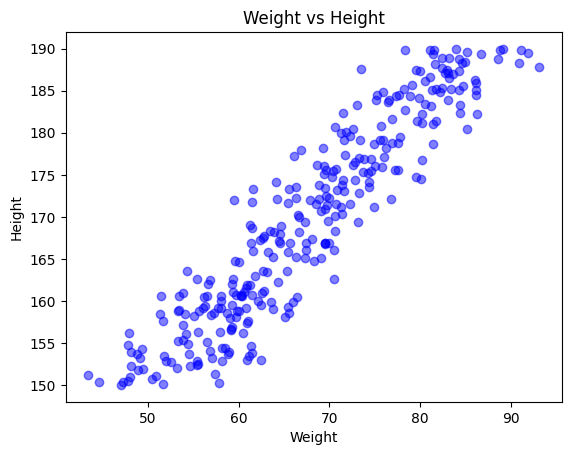

In [10]:
# Scatter plot of Height vs Height
plt.scatter(df['Weight'], df['Height'], color='blue', alpha=0.5)
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [11]:
# correlation : helps to understand the strength and direction of the linear relationship between two variables.
correlation = df['Weight'].corr(df['Height'])
correlation

np.float64(0.9308928986106345)

the correlation coefficient between Weight and Height is approximately 0.94, indicating a strong positive linear relationship between the two variables.

In [12]:
# other way
df.corr()

,Height,Weight
Height,1.000000,0.930893
Weight,0.930893,1.000000


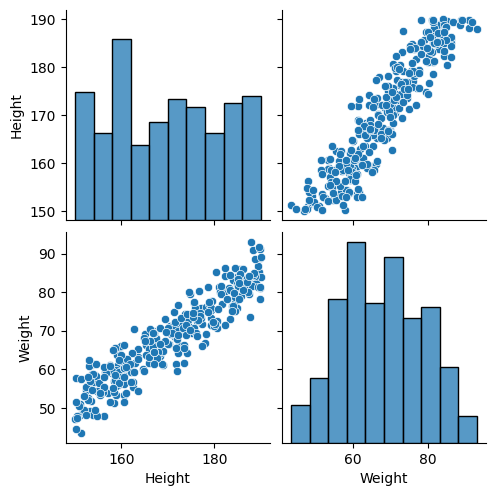

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
# lets assume weight as independent variable and height as dependent variable
x_series = df['Weight']
type(x_series)

pandas.core.series.Series

In [15]:
x_series.shape

(300,)

Type of x_series is pandas.core.series.Series so we need to convert it into a dataframe or 2D array.

In [16]:
x = df[['Weight']]
type(x)

pandas.core.frame.DataFrame

In [17]:
x.shape

(300, 1)

Our Dependent variable y is also a Series. We can keep it as it is because sklearn will internally convert it into a 1D array.

In [18]:
y = df['Height']
y.shape

(300,)

In [19]:
type(y)
# no issue here because sklearn can take series or 1D array as dependent variable

pandas.core.series.Series

### Train Test Split

- test_size=0.2 means 20% data will be used for testing and remaining 80% data will be used for training.
- random_state=42 is used to ensure reproducibility of the results.so that every time we run the code, we get the same train-test split.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240,), (60,))

Standardization is the process of scaling features so that they have a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

- We use StandardScaler from sklearn.preprocessing to standardize the features, that is, the independent variable (Weight) in this case.
- internally it uses the formula: z = (x - mean) / std_dev to standardize each feature.
- we fit the scaler on the training data using fit_transform and then use the same scaler to transform the test data using transform. This ensures that both training and test data are scaled in the same way.
- we do this only for the independent variable(s) (Weight) and not for the dependent variable (Height).
- but for Simple Linear Regression, scaling is not strictly necessary, but it's a good practice, especially when dealing with multiple features or more complex models.


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Difference between fit_transform and transform ★★★★★

- The fit_transform method is used to fit the scaler to the training data and then transform it. It calculates the mean and standard deviation from the training data and uses these values to scale the data.
- The transform method is used to scale new data (like the test set) using the mean and standard deviation calculated from the training data. This ensures that both training and test data are scaled in the same way.

### Why do we use transform separately on test data?

- We use transform separately on the test data to ensure that the scaling is consistent with the training data. If we were to use fit_transform on the test data, it would calculate new mean and standard deviation values based on the test data, which could lead to discrepancies in scaling between the training and test sets. This inconsistency can negatively impact the performance of the machine learning model.

- `Data Leakage Prevention`: Using fit_transform on the test data would introduce information from the test set into the scaling process, which is a form of data leakage. This can lead to overly optimistic performance estimates and poor generalization to new, unseen data. By using transform, we ensure that the test data is scaled based solely on the training data statistics, maintaining the integrity of the evaluation process.

In [47]:
# apply Linear Regression Model
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression(n_jobs=-1) # n_jobs=-1 means use all available CPU cores for training

In [49]:
# try to fit the model with a single feature series but it will give error since it expects 2D array for independent variable
# model.fit(x_series, y_train)

In [50]:
model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
print("Coefficients or slope of model:", model.coef_)

Coefficients or slope of model: [11.07038313]


`Slope` (or Coefficient) represents the change in the dependent variable (Height) for a one-unit change in the independent variable (Weight). In other words, it indicates how much Height is expected to increase (or decrease) when Weight increases by one unit.

In [28]:
print("Intercept of model:", model.intercept_)

Intercept of model: 169.9910416666667


`Intercept` is the value of the dependent variable (Height) when the independent variable (Weight) is zero. It represents the point where the regression line crosses the y-axis.

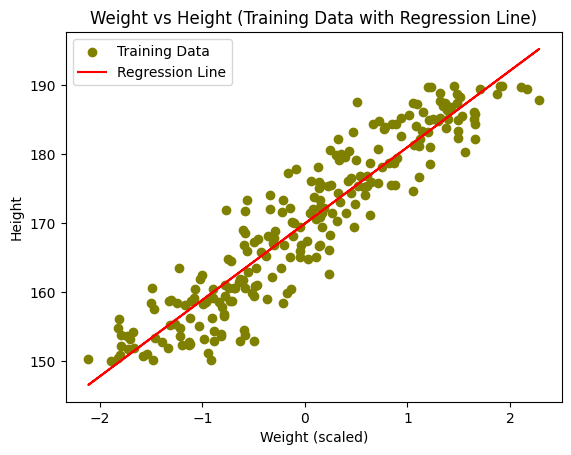

In [29]:
# visualize the regression line with training data
plt.scatter(x_train_scaled, y_train, color='olive',label='Training Data')
plt.plot(x_train_scaled, model.predict(x_train_scaled), color='red', label='Regression Line')
plt.title('Weight vs Height (Training Data with Regression Line)')
plt.xlabel('Weight (scaled)')
plt.ylabel('Height')
plt.legend()
plt.show()

## Prediction on test data

Predicted height output = intercept + (slope * scaled weight input) or y = b0 + b1*x

y_pred = 169.99 + (11.07 * scaled weight input)

In [31]:
# Prediction on test data
y_pred = model.predict(x_test_scaled)
y_pred

array([161.20854605, 182.17682132, 164.76521564, 145.42456883,
       175.31465936, 172.73255742, 169.90932534, 183.80444978,
       178.15798562, 163.07730465, 165.67950077, 177.63553698,
       162.5649031 , 167.49802392, 183.58341381, 172.9435463 ,
       162.67542108, 183.82454396, 161.73099469, 154.01483014,
       158.52597322, 155.9237771 , 161.28892276, 161.36929948,
       162.34386713, 162.8462216 , 167.15642289, 178.93161149,
       168.42235613, 173.47604203, 176.40979209, 180.96112352,
       185.32156026, 193.09800734, 180.40853361, 156.25533105,
       163.17777554, 160.51529689, 158.82738589, 157.39065213,
       172.06944953, 183.23176569, 177.21355923, 187.32093102,
       165.49865316, 173.7774547 , 158.36521979, 187.03961252,
       155.43146973, 162.97683376, 178.04746764, 171.59723634,
       172.41105056, 167.45783556, 149.26255692, 155.86349456,
       173.38561822, 179.05217656, 160.1335075 , 165.18719339])

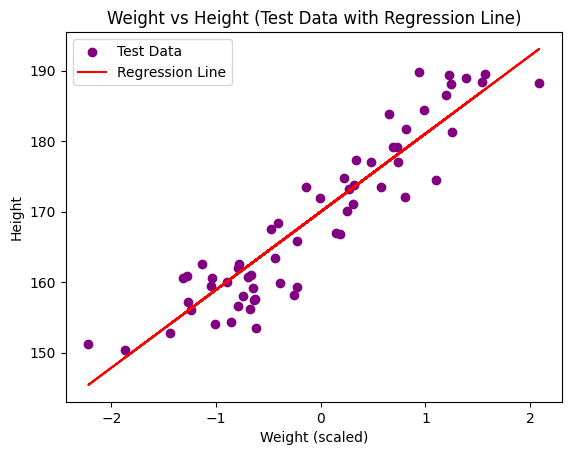

In [32]:
# visualize the regression line with test data
plt.scatter(x_test_scaled, y_test, color='purple',label='Test Data')
plt.plot(x_test_scaled, model.predict(x_test_scaled), color='red', label='Regression Line')
plt.title('Weight vs Height (Test Data with Regression Line)')
plt.xlabel('Weight (scaled)')
plt.ylabel('Height')
plt.legend()
plt.show()

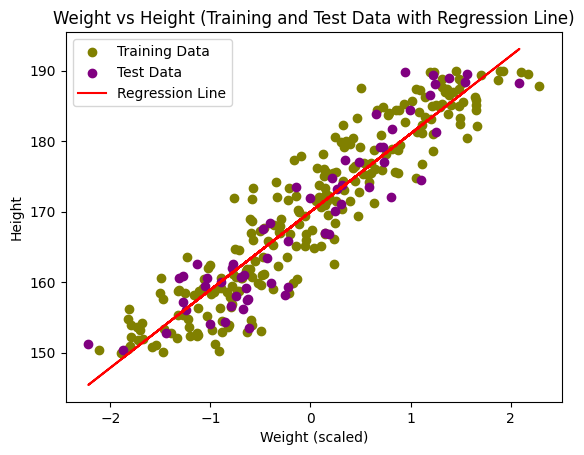

In [33]:
# visualize the regression line with both training and test data
plt.scatter(x_train_scaled, y_train, color='olive',label='Training Data')
plt.scatter(x_test_scaled, y_test, color='purple',label='Test Data')
plt.plot(x_test_scaled, model.predict(x_test_scaled), color='red', label='Regression Line')
plt.title('Weight vs Height (Training and Test Data with Regression Line)')
plt.xlabel('Weight (scaled)')
plt.ylabel('Height')
plt.legend()
plt.show()

### Performance Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

**MSE (Mean Squared Error)**: 18.87 this means that on average, the predicted heights deviate from the actual heights by approximately 18.87 units (e.g., centimeters). 

A lower MSE value indicates better predictive accuracy of the model

In [35]:
mse = mean_squared_error(y_test, y_pred)
mse

18.868482382077403

**MAE (Mean Absolute Error)**: 3.61 this indicates that, on average, the predicted heights deviate from the actual heights by approximately 3.61 units. 

A lower MAE value indicates better predictive accuracy of the model.

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.6101075091241577

In [84]:
rmse = np.sqrt(mse)
rmse

np.float64(4.343786640947895)

**R²** indicates that `approximately 86% of the variance in the dependent variable (Height) can be explained by the independent variable (Weight) using this linear regression model` . 

An R² value closer to 1 indicates a better fit of the model to the data.

Formula for R²:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

here , 
- $y_i$ represents the actual values of the dependent variable.
- $\hat{y}_i$ represents the predicted values from the regression model.
- $\bar{y}$ is the mean of the actual values.

In [37]:
r2 = r2_score(y_test, y_pred)
r2

0.8607893952566565

**Adjusted R²** takes into account the number of predictors in the model. It adjusts the R² value based on the number of independent variables and the sample size, providing a more accurate measure of model performance, especially when comparing models with different numbers of predictors.

Formula for Adjusted R²:

$$
R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}
$$

here ,
- $n$ = number of observations (data points) in the test set
- $p$ = number of independent variables (predictors) in the model
- $R^2$ = coefficient of determination 

In [38]:
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
adj_r2

0.858389212416254

## Trying With OLS technique

it is by default used in statsmodels library for linear regression.

In [39]:
import statsmodels.api as sm

In [43]:
model_2 = sm.OLS(y_train,x_train_scaled).fit()

In [44]:
prediction = model_2.predict(x_test_scaled)
prediction

array([ -8.78249562,  12.18577965,  -5.22582602, -24.56647284,
         5.32361769,   2.74151575,  -0.08171633,  13.81340811,
         8.16694395,  -6.91373702,  -4.3115409 ,   7.64449531,
        -7.42613857,  -2.49301775,  13.59237215,   2.95250463,
        -7.31562059,  13.83350229,  -8.26004698, -15.97621153,
       -11.46506845, -14.06726457,  -8.70211891,  -8.62174219,
        -7.64717453,  -7.14482007,  -2.83461878,   8.94056982,
        -1.56868554,   3.48500036,   6.41875042,  10.97008185,
        15.33051859,  23.10696567,  10.41749194, -13.73571062,
        -6.81326613,  -9.47574478, -11.16365577, -12.60038954,
         2.07840786,  13.24072402,   7.22251756,  17.32988935,
        -4.49238851,   3.78641304, -11.62582188,  17.04857085,
       -14.55957194,  -7.01420791,   8.05642597,   1.60619467,
         2.4200089 ,  -2.5332061 , -20.72848474, -14.1275471 ,
         3.39457656,   9.06113489,  -9.85753417,  -4.80384828])

In [45]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.013
Date:                Sat, 17 Jan 2026   Prob (F-statistic):                       0.315
Time:                        18:47:40   Log-Likelihood:                         -1573.2
No. Observations:                 240   AIC:                                      3148.
Df Residuals:                     239   BIC:                                      3152.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.0704     10.999      1.006      0.315     -10.598      32.738
==============================================================================
Omnibus:                        0.172   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.315
Skew:                          -0.012   Prob(JB):                        0.854
Kurtosis:                       2.824   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# here we can see the statistical details of the linear regression model including R-squared, adjusted R-squared, coefficients, p-values, and more.

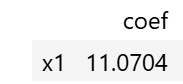

here we can see thatthe coef is 11.07 which is same as we got from sklearn linear regression model.

## Prediction for new data point

In [51]:
model.predict([[70]])
# why 944.9178611 for weight 70?
# because we have scaled the weight feature before training the model. The StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1.
# so to get the without 

array([944.9178611])

In [ ]:
# so either do this 
model.predict(scaler.transform([[70]]))

d:\CODES\Machine-Learning-From-Scratch\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([172.08954371])

- This means that for a person weighing 70 units (e.g., kilograms), the predicted height would be approximately 169.99 + (11.07 * scaled weight input).

- To make a prediction for a new data point (e.g., a person weighing 70 units), we need to standardize the input weight using the same scaler that was fitted on the training data. Then, we can use the linear regression model to predict the height.

In [52]:
model_1 = LinearRegression(n_jobs=-1)

In [54]:
model_1.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [55]:
model_1.predict([[70]])

d:\CODES\Machine-Learning-From-Scratch\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([172.08954371])